In [7]:
import torch
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [9]:
train = datasets.MNIST("",train=True,download=True,transform=transforms.ToTensor())
trainset = torch.utils.data.DataLoader(train,batch_size=64,shuffle=True)

In [11]:
dataiter = iter(trainset)
images , labels = next(dataiter)
print(torch.min(images),torch.max(images))

tensor(0.) tensor(1.)


In [12]:
images.shape

torch.Size([64, 1, 28, 28])

In [23]:
class AutoEncoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28*28,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,12),
        nn.ReLU(),
        nn.Linear(12,3)
        )
    self.decoder = nn.Sequential(
        nn.Linear(3,12),
        nn.ReLU(),
        nn.Linear(12,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128,784),
        nn.Sigmoid()
        )

  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [24]:
model = AutoEncoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=1e-3, weight_decay=1e-5)

In [25]:
num_epochs = 10
outputs = []

for epoch in range(num_epochs):
  for (img,_) in trainset:
    img = img.reshape(-1,28*28)
    recon_img = model(img)
    loss = criterion(recon_img,img)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f"Epoch:{epoch+1}, Loss:{loss.item():.4f}")
  outputs.append((epoch,img,recon_img))

Epoch:1, Loss:0.0480
Epoch:2, Loss:0.0407
Epoch:3, Loss:0.0364
Epoch:4, Loss:0.0409
Epoch:5, Loss:0.0403
Epoch:6, Loss:0.0348
Epoch:7, Loss:0.0373
Epoch:8, Loss:0.0367
Epoch:9, Loss:0.0309
Epoch:10, Loss:0.0290


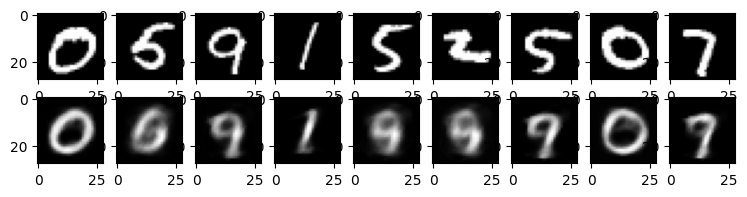

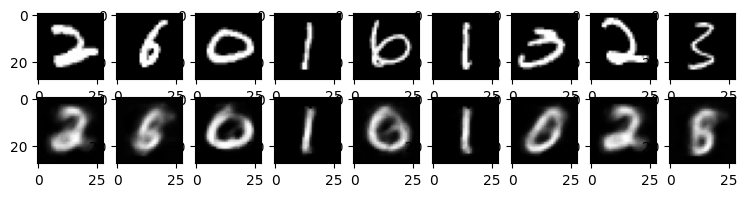

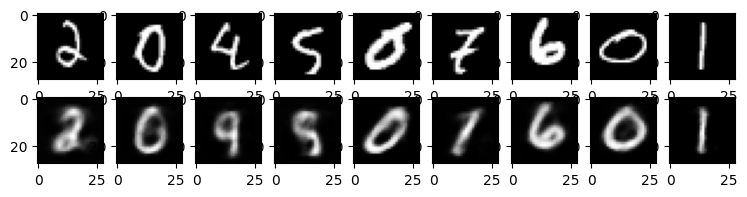

In [28]:
for k in range(0,num_epochs,4):
  plt.figure(figsize=(9,2))
  plt.gray()
  imgs = outputs[k][1].detach().numpy()  # output img is tensor so detach is used to convert it to numpy array
  recon_img = outputs[k][2].detach().numpy()
  for i, item in enumerate(imgs):
    if i>=9:
      break
    plt.subplot(2,9,i+1)
    item = item.reshape(-1,28,28)
    plt.imshow(item[0])

  for i, item in enumerate(recon_img):
    if i>=9:
      break
    plt.subplot(2,9,9+i+1)
    item = item.reshape(-1,28,28)
    plt.imshow(item[0])

CNN Encoder

In [37]:
class AutoEncoder_CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Conv2d(1,16,3,stride=2, padding=1),  # N,16,14,14
        nn.ReLU(),
        nn.Conv2d(16,32,3,stride=2, padding=1), # N, 32,7,7
        nn.ReLU(),
        nn.Conv2d(32,64,7)   # N,64,1,1
        )


    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(64,32,7),   # N,32,7,7
        nn.ReLU(),
        nn.ConvTranspose2d(32,16,3, stride=2, padding=1, output_padding = 1),  # N,32,13,13  ---> N,32,14,14
        nn.ReLU(),
        nn.ConvTranspose2d(16,1,3,stride=2, padding=1, output_padding=1), #N,16,28,28
        nn.Sigmoid()
        )

  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [38]:
model = AutoEncoder_CNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=1e-3, weight_decay=1e-5)

In [40]:
num_epochs = 10
outputs = []

for epoch in range(num_epochs):
  for (img,_) in trainset:
    recon_img = model(img)
    loss = criterion(recon_img,img)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f"Epoch:{epoch+1}, Loss:{loss.item():.4f}")
  outputs.append((epoch,img,recon_img))

Epoch:1, Loss:0.0101
Epoch:2, Loss:0.0054
Epoch:3, Loss:0.0040
Epoch:4, Loss:0.0038
Epoch:5, Loss:0.0034
Epoch:6, Loss:0.0031
Epoch:7, Loss:0.0025
Epoch:8, Loss:0.0031
Epoch:9, Loss:0.0026
Epoch:10, Loss:0.0031


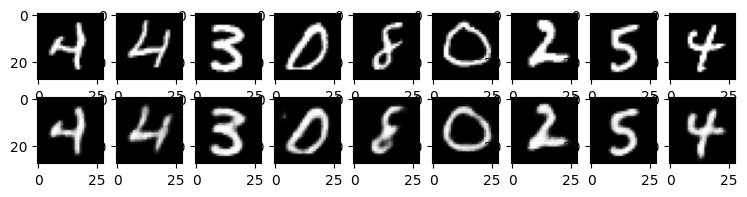

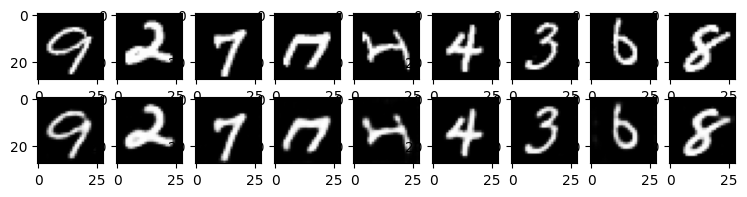

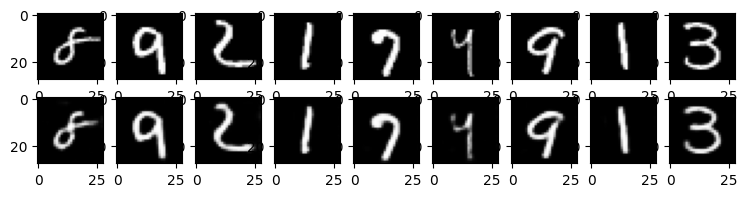

In [41]:
for k in range(0,num_epochs,4):
  plt.figure(figsize=(9,2))
  plt.gray()
  imgs = outputs[k][1].detach().numpy()  # output img is tensor so detach is used to convert it to numpy array
  recon_img = outputs[k][2].detach().numpy()
  for i, item in enumerate(imgs):
    if i>=9:
      break
    plt.subplot(2,9,i+1)
    plt.imshow(item[0])

  for i, item in enumerate(recon_img):
    if i>=9:
      break
    plt.subplot(2,9,9+i+1)
    plt.imshow(item[0])